# Compare Cell Types

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
from scipy.sparse import issparse
print(ad.__version__)

0.11.4


In [2]:
# There are 9 excel files in the folder results
# The excel files have two collumns: 'Gene' and 'Number of Significant Differences'

# The excel files are named: "results/{}_significant_differences.xlsx".format(cell_type)
cell_types = [
    # "CD8-positive, alpha-beta T cell",
    "CD8-positive, alpha-beta memory T cell",
    "CD4-positive, alpha-beta T cell",
    # "central memory CD4-positive, alpha-beta T cell",
    "effector memory CD4-positive, alpha-beta T cell",
    "gamma-delta T cell",
    "regulatory T cell",
    # "double negative T regulatory cell",
    # "innate lymphoid cell"
]

# Load all the excel files into separate dictionaries
excel_files = {}

for cell_type in cell_types:
    file_path = f"results/network/young_old//{cell_type}_significant_differences.xlsx"
    excel_files[cell_type] = pd.read_excel(file_path)
    

In [3]:
# Print the top 10 rows of each dataframe
for cell_type, df in excel_files.items():
    print(f"Top 10 rows for {cell_type}:")
    print(df.head(10))
    print("\n")



Top 10 rows for CD8-positive, alpha-beta memory T cell:
              Gene  Number of Significant Differences
0  ENSG00000241343                                153
1  ENSG00000177954                                129
2  ENSG00000124614                                122
3  ENSG00000151883                                119
4  ENSG00000087074                                118
5  ENSG00000145592                                117
6  ENSG00000197061                                113
7  ENSG00000100345                                113
8  ENSG00000198840                                109
9  ENSG00000232112                                107


Top 10 rows for CD4-positive, alpha-beta T cell:
              Gene  Number of Significant Differences
0  ENSG00000160888                                112
1  ENSG00000228253                                101
2  ENSG00000099860                                 99
3  ENSG00000105939                                 90
4  ENSG00000197111           

In [4]:
# Load all the excel files of the same cell type
# The excel files have 6 columns: 'Gene1' and 'Gene2', 'Correlation Difference', 'Correlation Young', 'Correlation Middle', 'Correlation Old'

excel_files_top_diff_genes = {}

for cell_type in cell_types:
    file_path = f"results/{cell_type}_top_diff_genes.xlsx"
    excel_files_top_diff_genes[cell_type] = pd.read_excel(file_path)


In [5]:
# Print the regular T cell file
print(excel_files_top_diff_genes["CD4-positive, alpha-beta T cell"].head(10).to_string(index=False))

          Gene1           Gene2  Correlation Difference  Correlation Young  Correlation Middle  Correlation Old  Z Diff Young-Middle  Z Diff Middle-Old  Z Diff Young-Old
ENSG00000104660 ENSG00000197111                0.941815          -0.371038           -0.008649         0.570777            -2.855951          -4.055310         -5.996285
ENSG00000197111 ENSG00000104660                0.941815          -0.371038           -0.008649         0.570777            -2.855951          -4.055310         -5.996285
ENSG00000147604 ENSG00000197111                0.937499          -0.352208            0.111207         0.585291            -3.595502          -3.447502         -5.997064
ENSG00000197111 ENSG00000147604                0.937499          -0.352208            0.111207         0.585291            -3.595502          -3.447502         -5.997064
ENSG00000125691 ENSG00000197111                0.935570          -0.404992            0.034008         0.530578            -3.475530          -3.43592

In [6]:
# Create a new dictionary where we add all the significant differences for each cell type
# all_significant_differences = {} gene: number of significant differences
all_significant_differences = {}
for cell_type, df in excel_files.items():
    for index, row in df.iterrows():
        gene = row['Gene']
        number_of_differences = row['Number of Significant Differences']
        
        if gene not in all_significant_differences:
            all_significant_differences[gene] = 0
            
        all_significant_differences[gene] += number_of_differences

# Sort the dictionary by number of significant differences
sorted_significant_differences = sorted(all_significant_differences.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame
df_significant_differences = pd.DataFrame(sorted_significant_differences, columns=['Gene', 'Number of Significant Differences'])

In [7]:
# print the top 10 genes with the most significant differences
print("=== Top 10 Genes with the Most Significant Differences ===")
print(df_significant_differences.head(10).to_string(index=False))

# Print the total number of significant differences
total_significant_differences = df_significant_differences['Number of Significant Differences'].sum()
print(f"\nTotal number of significant differences across all cell types: {total_significant_differences}")

=== Top 10 Genes with the Most Significant Differences ===
           Gene  Number of Significant Differences
ENSG00000241343                                534
ENSG00000232112                                478
ENSG00000087074                                475
ENSG00000124614                                444
ENSG00000100345                                434
ENSG00000160888                                430
ENSG00000197061                                418
ENSG00000198840                                407
ENSG00000099860                                407
ENSG00000136490                                400

Total number of significant differences across all cell types: 77084


C:\Users\Tycho\AppData\Local\Temp\ipykernel_8884\2380109613.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


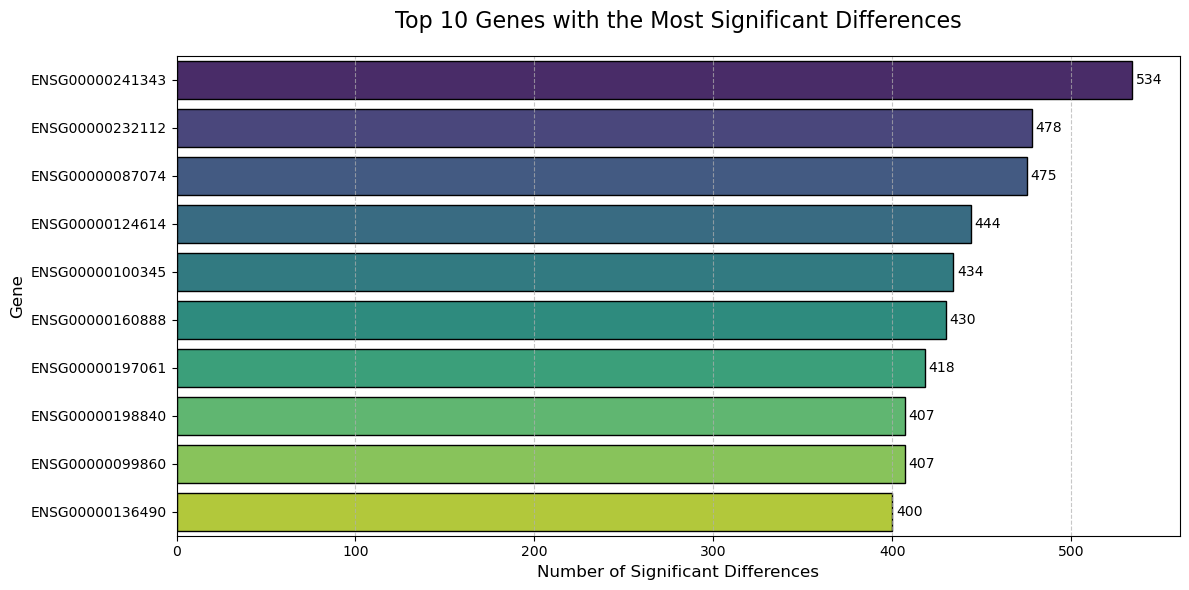

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named `df_significant_differences`
top_10 = df_significant_differences.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Number of Significant Differences', 
    y='Gene', 
    data=top_10,
    palette='viridis',  # Use any palette you like (e.g., 'magma', 'plasma')
    edgecolor='black'
)

# Customize the plot
plt.title('Top 10 Genes with the Most Significant Differences', fontsize=16, pad=20)
plt.xlabel('Number of Significant Differences', fontsize=12)
plt.ylabel('Gene', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for i, value in enumerate(top_10['Number of Significant Differences']):
    plt.text(value + 2, i, f'{value}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [9]:
# Test if the pareto principle applies
# Calculate the cumulative sum of significant differences
total = df_significant_differences['Number of Significant Differences'].cumsum()

int_twenty = int(0.2 * len(df_significant_differences)) - 1
print(f"Total number of significant differences: {total.iloc[-1]}")
print(f"Total number of significant differences in the top 20%: {total[int_twenty]}")
print(f"Percentage of significant differences in the top 20%: {(total[int_twenty] / total.iloc[-1]) * 100:.2f}%")
print(f"Total number of genes: {len(df_significant_differences)}")

Total number of significant differences: 77084
Total number of significant differences in the top 20%: 39859
Percentage of significant differences in the top 20%: 51.71%
Total number of genes: 756


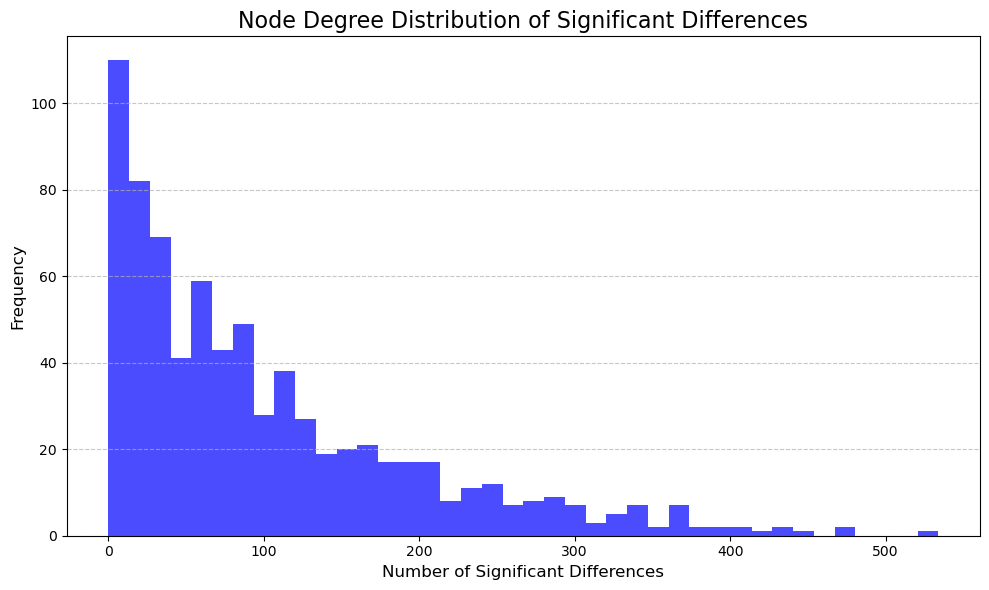

In [10]:
# Plot a node degree distribution for df_significant_differences
plt.figure(figsize=(10, 6))
plt.hist(df_significant_differences['Number of Significant Differences'], bins=40, color='blue', alpha=0.7)
plt.title('Node Degree Distribution of Significant Differences', fontsize=16)
plt.xlabel('Number of Significant Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
# Find all the distinct genes in the 9 different cell types
distinct_genes = set()
for cell_type, df in excel_files_top_diff_genes.items():
    distinct_genes.update(df['Gene1'].unique())
    distinct_genes.update(df['Gene2'].unique())

# Print the number of distinct genes
print(f"Number of distinct genes across all cell types: {len(distinct_genes)}")

Number of distinct genes across all cell types: 756


In [ ]:
# Find the feature name for all the distinct genes in the anndata object

adata = ad.read_h5ad("../h5ad/0fce5dd5-bcec-4288-90b3-19a16b45ad16.h5ad", backed='r')


results = []
for target_gene in distinct_genes:
    result = adata.var['feature_name'][target_gene]
    results.append(result)
    print(result.split('_')[0])

# Set a threshold for hub genes
threshold = 300
print(f"Threshold for hub genes: {threshold}")
hub_genes = df_significant_differences[df_significant_differences['Number of Significant Differences'] > threshold]['Gene'].tolist()
results_hub_genes = []
for target_gene in hub_genes:
    result = adata.var['feature_name'][target_gene]
    results_hub_genes.append(result)
    print(result.split('_')[0])


# print(results)
# print(results_top_10_genes)

# Save the results to a text file
with open('results/all_genes.txt', 'w') as f:
    for gene in results:
        f.write(f"{gene.split('_')[0]}\n")

# Save the top 10 genes to a text file
with open('results/hub_genes.txt', 'w') as f:
    for gene in results_hub_genes:
        f.write(f"{gene.split('_')[0]}\n")


COX6A1
TLE5
MT-ND2
TLN1
UBB
SRSF7
NSA2
RIPOR2
GPSM3
RPL36
SAP18
LCK
EEF1D
SRSF11
SF3B2
CD99
COX4I1
AQP3
PPP1R2
RPL27
PPIB
RORA
FCMR
KLF3
NKG7
PPIA
RPL27A
RPL36AL
RPLP2
CITED2
RPS18
MT-ND5
PLP2
HLA-E
S100A6
PRMT2
ADAR
GATA3
BIRC3
FYN
S1PR4
YPEL3
FNBP1
SELPLG
LAPTM5
ACTR2
RHOH
RESF1
XBP1
KHDRBS1
EID1
ABLIM1
MT-ND1
RAN
RPL10
CUTA
CLEC2B
RPLP1
SMDT1
TBX21
TRDV2
RAD21
HNRNPA0
DNAJA1
ARPC2
SH3KBP1
LCP1
PIM1
SUMO2
KLRC1
TBC1D10C
H1-4
CTSC
RPL12
JUNB
BRD2
H1-10
LGALS1
IL32
CD3G
MT-ND4L
RSL1D1
RPL36A
TMEM258
CXCR4
CALR
COX7A2
ARL6IP5
CTSD
IER2
RPS7
DUSP2
YBX1
TMSB4X
CD3D
DDX3X
ATP5IF1
TUBB4B
PRF1
UBE2D3
PPDPF
RPL6
TGFB1
MT-CO1
TAGLN2
RPS20
ITGB1
CHD2
ARHGAP15
RPS13
H4C3
BZW1
GZMB
RPS5
NCL
MYL12B
TGFBR3
FOXP1
HMGB2
PIK3IP1
TNFRSF1B
CYLD
SPON2
UQCR11
GPX4
HNRNPF
TRIR
CD47
LCP2
LRRFIP1
ATP6V1G1
MT-ATP6
PNISR
RPL34
UQCR10
PLEK
HSP90AA1
RPS27
CDC37
H3-3A
EVI2B
RHOA
TTC39C
RPL30
ARHGDIA
S100A10
TPI1
NOP53
CD37
PTGER4
RGS1
ABHD17A
PARK7
FGFBP2
HNRNPUL1
NDUFA11
RPL4
ARPC5
ITM2A
RPSA
IDS
TOMM7
HP1BP3
PR

C:\Users\Tycho\AppData\Local\Temp\ipykernel_8884\3486649386.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_genes['Gene'] = hub_genes['Gene'].apply(lambda x: adata.var['feature_name'][x].split('_')[0])
C:\Users\Tycho\AppData\Local\Temp\ipykernel_8884\3486649386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


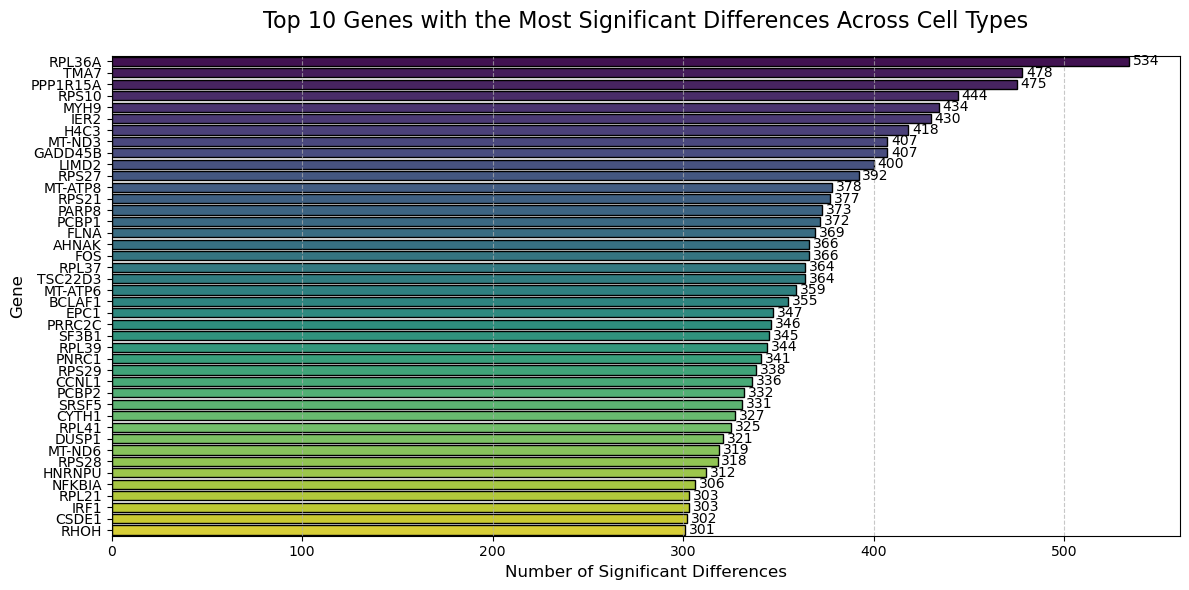

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named `df_significant_differences`
hub_genes = df_significant_differences[df_significant_differences['Number of Significant Differences'] > threshold]

# Replace the top 10 genes with the actual gene names from the anndata object
hub_genes['Gene'] = hub_genes['Gene'].apply(lambda x: adata.var['feature_name'][x].split('_')[0])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Number of Significant Differences', 
    y='Gene', 
    data=hub_genes,
    palette='viridis',  # Use any palette you like (e.g., 'magma', 'plasma')
    edgecolor='black'
)

# Customize the plot
plt.title('Top 10 Genes with the Most Significant Differences Across Cell Types', fontsize=16, pad=20)
plt.xlabel('Number of Significant Differences', fontsize=12)
plt.ylabel('Gene', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for i, value in enumerate(hub_genes['Number of Significant Differences']):
    plt.text(value + 2, i, f'{value}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

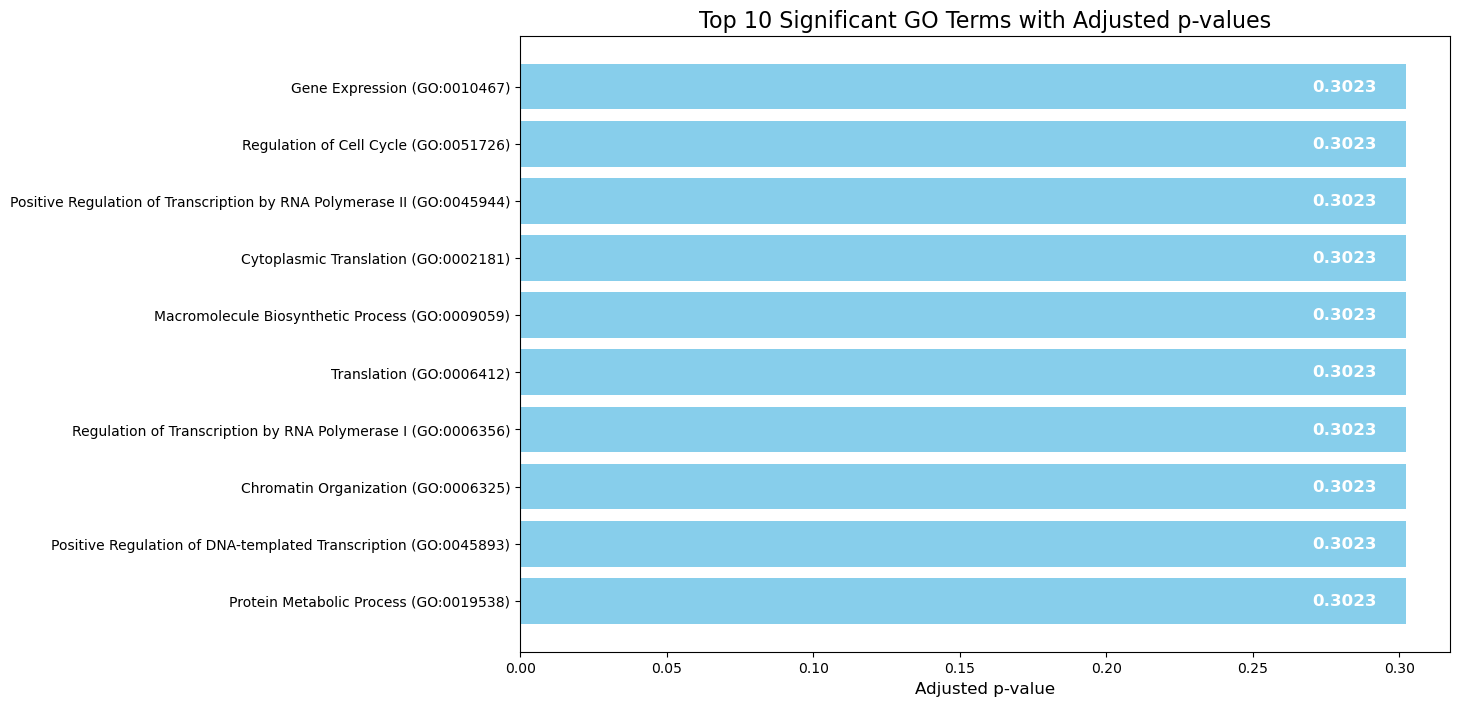

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
data = [
    {"Name": "Gene Expression (GO:0010467)", "Adjusted p-value": 0.3023},
    {"Name": "Regulation of Cell Cycle (GO:0051726)", "Adjusted p-value": 0.3023},
    {"Name": "Positive Regulation of Transcription by RNA Polymerase II (GO:0045944)", "Adjusted p-value": 0.3023},
    {"Name": "Cytoplasmic Translation (GO:0002181)", "Adjusted p-value": 0.3023},
    {"Name": "Macromolecule Biosynthetic Process (GO:0009059)", "Adjusted p-value": 0.3023},
    {"Name": "Translation (GO:0006412)", "Adjusted p-value": 0.3023},
    {"Name": "Regulation of Transcription by RNA Polymerase I (GO:0006356)", "Adjusted p-value": 0.3023},
    {"Name": "Chromatin Organization (GO:0006325)", "Adjusted p-value": 0.3023},
    {"Name": "Positive Regulation of DNA-templated Transcription (GO:0045893)", "Adjusted p-value": 0.3023},
    {"Name": "Protein Metabolic Process (GO:0019538)", "Adjusted p-value": 0.3023}
]

# Extract names and p-values
names = [entry["Name"] for entry in data]
p_values = [entry["Adjusted p-value"] for entry in data]

# Create the plot
plt.figure(figsize=(12, 8))

# Create bars
y_pos = np.arange(len(names))
bars = plt.barh(y_pos, p_values, color='skyblue')

# Add p-value labels (positioned inside bars)
for i, (name, p_val) in enumerate(zip(names, p_values)):
    plt.text(p_val - 0.01, i, 
             f'{p_val:.4f}', 
             ha='right', va='center',
             color='white',
             fontweight='bold',
             fontsize=12)
    
# Add axis labels and title
plt.title('Top 10 Significant GO Terms with Adjusted p-values', fontsize=16)
plt.xlabel('Adjusted p-value', fontsize=12)

# Invert y-axis to maintain top-to-bottom order
plt.gca().invert_yaxis()

# Customize the plot
plt.yticks(y_pos, names, fontsize=10)
plt.xlabel

In [14]:
# Load all the network excel files for all cell types
cell_types = [
    # "CD8-positive, alpha-beta T cell",
    "CD8-positive, alpha-beta memory T cell",
    "CD4-positive, alpha-beta T cell",
    # "central memory CD4-positive, alpha-beta T cell",
    "effector memory CD4-positive, alpha-beta T cell",
    "gamma-delta T cell",
    "regulatory T cell",
    # "double negative T regulatory cell",
    # "innate lymphoid cell"
]

distinct_genes = set()

network_data = {}
for cell_type in cell_types:
    path = "results/network/young_old/{}_gene_associations.xlsx".format(cell_type)
    try:
        df = pd.read_excel(path)
        network_data[cell_type] = df
        for gene in df['Gene'].unique():
            distinct_genes.add(gene)
    except FileNotFoundError:
        print(f"File not found for cell type: {cell_type}")

In [15]:
# Loop over all the genes in distinct_genes and retrieve the list of associations for each gene
def get_gene_associations(gene, network_data):
    associations = {}
    for cell_type, df in network_data.items():
        if gene in df['Gene'].values:
            # Check if association is empty
            if len(associations) == 0:
                string = df[df['Gene'] == gene]['Associated Genes'].values[0]
                string = string[1:-1]
                string = string.replace("'", "")

                if string == "" or len(string) == 0:
                    # print(f"No associations found for {gene} in {cell_type}")
                    return set()
                
                # print(f"Associations for {gene} in {cell_type}: {string}, {len(string)}")
                associations = set(string.split(', '))
                # print(f"Initial associations for {gene}: {associations}")
            else:
                # Intersect the associations with the new associations
                string = df[df['Gene'] == gene]['Associated Genes'].values[0]
                string = string[1:-1]
                string = string.replace("'", "")

                if string == "" or len(string) == 0:
                    # print(f"No associations found for {gene} in {cell_type}")
                    return set()
                
                new_associations = set(string.split(', '))
                temp = associations.copy()
                associations = temp.intersection(new_associations)
                
                if len(associations) == 0:
                    return set()
        else:
            return set()

    return associations



In [16]:
associations_across_cell_types = {}
for gene in distinct_genes:
    var = get_gene_associations(gene, network_data)
    
    if var and len(var) > 0:
        associations_across_cell_types[gene] = var


In [17]:
# Print the genes of the first gene
print(f"Number of genes with associations across cell types: {len(associations_across_cell_types)}")

# Convert the dictionary into a DataFrame
df = pd.DataFrame({
    "Gene": associations_across_cell_types.keys(),
    "Associated Genes": associations_across_cell_types.values()
})

# Write to Excel
df.to_csv('results/associations_across_cell_types.csv', index=False)

print("Excel file saved successfully!")

Number of genes with associations across cell types: 37
Excel file saved successfully!


In [18]:
# Print the correlation for the traget genes
target_gene_1 = "ENSG00000197111"
target_gene_2 = "ENSG00000158050"


for cell_type, df in excel_files_top_diff_genes.items():
    if target_gene_1 in df['Gene1'].values and target_gene_2 in df['Gene2'].values:
        # Print the row
        row = df[(df['Gene1'] == target_gene_1) & (df['Gene2'] == target_gene_2)]
        print(f"Cell Type: {cell_type}")
        print(row[['Gene1', 'Gene2', 'Correlation Difference', 'Correlation Young', 'Correlation Middle', 'Correlation Old']].to_string(index=False))
        print("\n")


Cell Type: CD8-positive, alpha-beta memory T cell
          Gene1           Gene2  Correlation Difference  Correlation Young  Correlation Middle  Correlation Old
ENSG00000197111 ENSG00000158050                0.498631           -0.42073           -0.333138         0.077901


Cell Type: CD4-positive, alpha-beta T cell
          Gene1           Gene2  Correlation Difference  Correlation Young  Correlation Middle  Correlation Old
ENSG00000197111 ENSG00000158050                0.705702          -0.354572           -0.281911          0.35113


Cell Type: effector memory CD4-positive, alpha-beta T cell
          Gene1           Gene2  Correlation Difference  Correlation Young  Correlation Middle  Correlation Old
ENSG00000197111 ENSG00000158050                0.673725          -0.464282           -0.212078         0.209443


Cell Type: gamma-delta T cell
          Gene1           Gene2  Correlation Difference  Correlation Young  Correlation Middle  Correlation Old
ENSG00000197111 ENSG00000158